In [2]:
import numpy as np

N = 600  # Размер выборки
alpha = 0.01  # Уровень значимости

# Генерируем случайную выборку с нормальным распределением
mean = 0  # Среднее значение
std_dev = 1  # Среднеквадратическое отклонение
data = np.random.normal(mean, std_dev, N)


In [3]:
# Расчет выборочного среднего
sample_mean = np.mean(data)

# Расчет выборочного среднеквадратического отклонения
sample_std_dev = np.std(data)

print("Выборочное среднее:", sample_mean)
print("Выборочное среднеквадратическое отклонение:", sample_std_dev)


Выборочное среднее: 0.08134533071322306
Выборочное среднеквадратическое отклонение: 1.0207431505308264


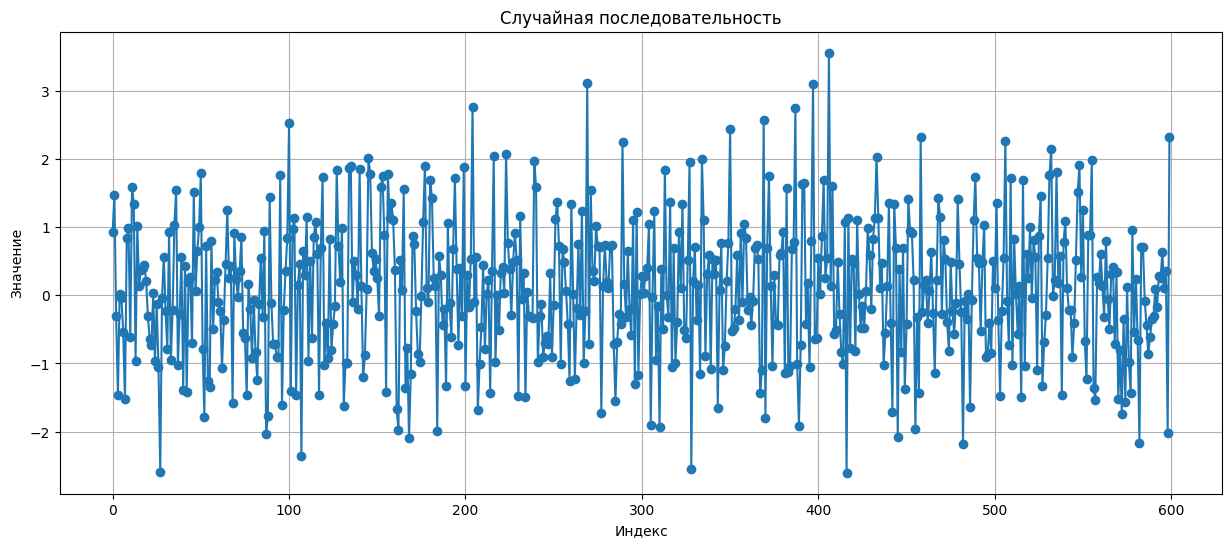

In [4]:
import matplotlib.pyplot as plt
# Построим график выборки
plt.figure(figsize=(15, 6))
plt.plot(range(N), data, marker='o', linestyle='-')
plt.title('Случайная последовательность')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

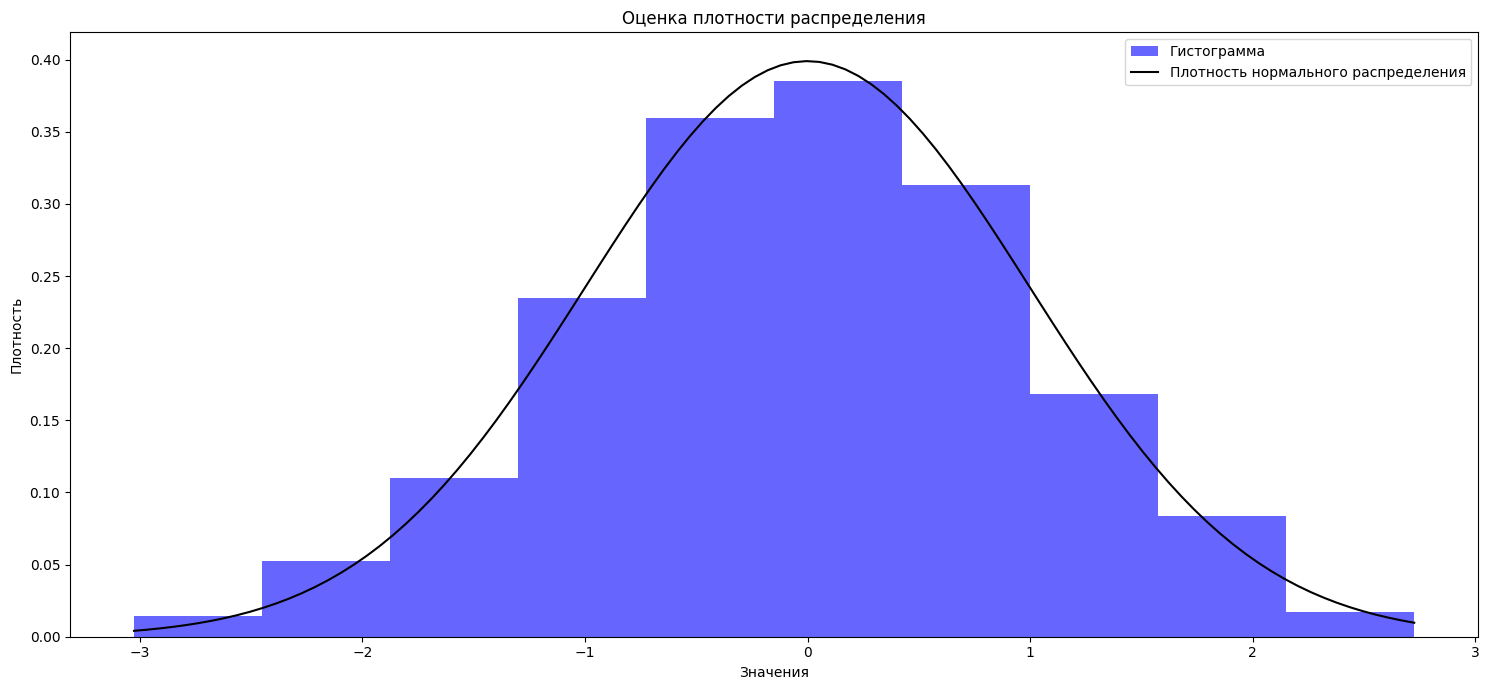

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 7))
# Построим гистограмму плотности распределения
plt.hist(data, bins=10, density=True, alpha=0.6, color='b', label='Гистограмма')
plt.title("Оценка плотности распределения")
plt.xlabel("Значения")
plt.ylabel("Плотность")
# Добавим график плотности нормального распределения для сравнения
x = np.linspace(min(data), max(data), 100)
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
plt.plot(x, pdf, 'k', label='Плотность нормального распределения')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
from scipy.stats import chi2
from scipy.stats import normaltest

# Вычисление ожидаемых частот для нормального распределения
expected_freq = len(data) * chi2.cdf(np.square(data - sample_mean), 1)

# Проверка на нормальность с использованием критерия хи-квадрат
stat_val, p_value = normaltest(data)

print("\nЗначение статистики для критерия нормальности:", stat_val)
print("Значение p-value для критерия нормальности:", p_value)


# Осуществим проверку на нормальность по заданному уровню значимости alpha
if p_value < alpha:
    print("Гипотеза о нормальности отвергается (p-value < alpha)")
else:
    print("Гипотеза о нормальности принимается (p-value >= alpha)")



Значение статистики для критерия нормальности: 1.4513071153820158
Значение p-value для критерия нормальности: 0.4840081383224776
Гипотеза о нормальности принимается (p-value >= alpha)


In [12]:
# Разделение выборки на 10 интервалов
num_bins = 10
hist, bin_edges = np.histogram(data, bins=num_bins)
intervals = [(bin_edges[i], bin_edges[i + 1]) for i in range(len(bin_edges) - 1)]

# Вычисление ожидаемых частот для каждого интервала
expected_freq = np.zeros(num_bins)
for i in range(num_bins):
    expected_freq[i] = len(data) * (chi2.cdf(intervals[i][1], 1) - chi2.cdf(intervals[i][0], 1))

# Проверка на нормальность с использованием критерия хи-квадрат
stat_val, p_value = normaltest(data)

print("\nЗначение статистики для критерия нормальности:", stat_val)
print("Значение p-value для критерия нормальности:", p_value)

# Осуществим проверку на нормальность по заданному уровню значимости alpha
if p_value < alpha:
    print("Гипотеза о нормальности отвергается (p-value < alpha)")
else:
    print("Гипотеза о нормальности принимается (p-value >= alpha)")

# Вывод ожидаемых и эмпирических частот
print("Ожидаемые частоты:", expected_freq)
print("Эмпирические частоты:", hist)
print("Количество степеней свободы:", num_bins - 1)


Значение статистики для критерия нормальности: 1.8292078924507875
Значение p-value для критерия нормальности: 0.40067528362875915
Гипотеза о нормальности принимается (p-value >= alpha)
Ожидаемые частоты: [  0.           0.           0.           0.           0.
 291.41601061 118.28558556  64.68845295  40.13633297  26.25778327]
Эмпирические частоты: [  5  18  38  81 124 133 108  58  29   6]
Количество степеней свободы: 9


Выборочное среднее: -0.03578871657928461
Выборочное среднеквадратическое отклонение: 1.0137401252651301
Эмпирические частоты в интервалах: [  3  10  36  75 123 180  95  54  21   3]
Ожидаемые частоты в интервалах: [3.0, 17.0, 63.0, 160.0, 268.0, 124.0, 226.0, 113.0, 38.0, 8.0]
Количество степеней свободы: 7

Значение статистики для критерия нормальности: 1.4792879117689073
Значение p-value для критерия нормальности: 0.4772838193679385
Гипотеза о нормальности принимается (p-value >= alpha)


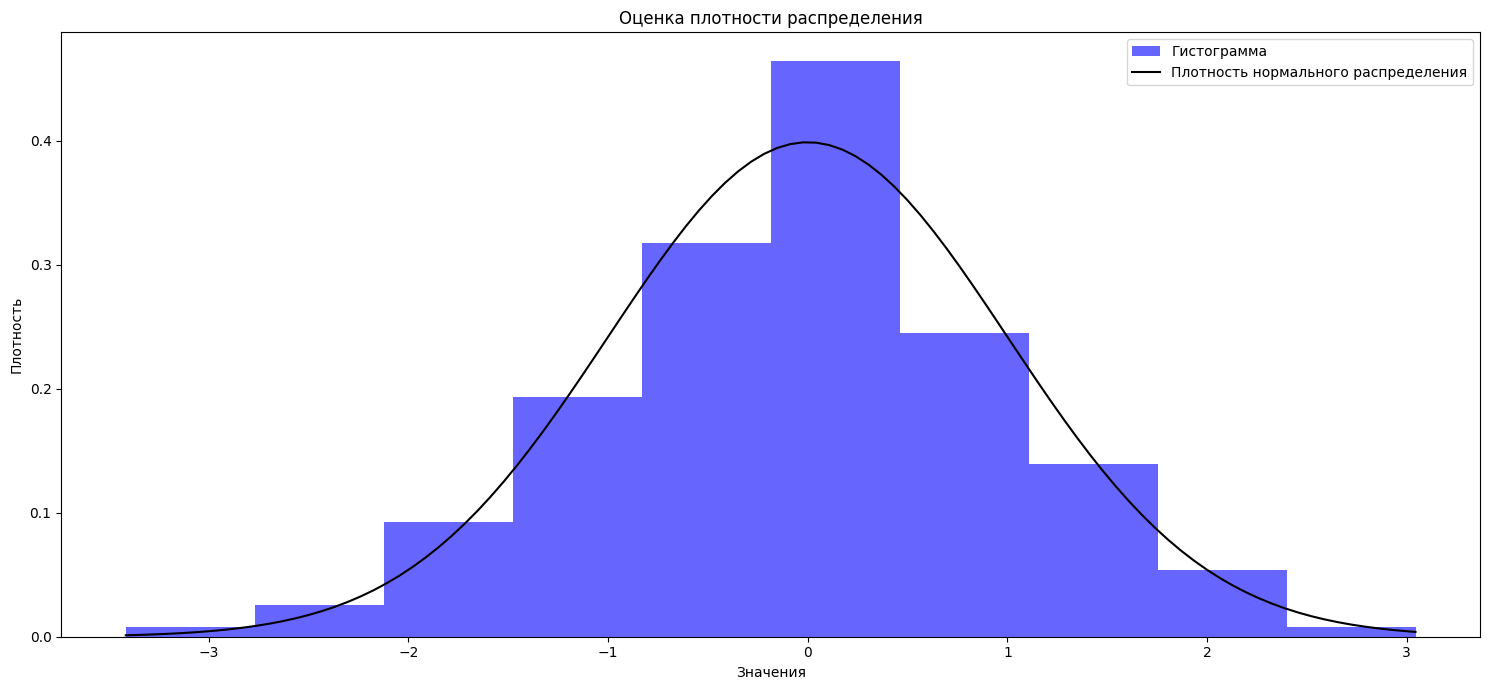

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.stats import normaltest

N = 600  # Размер выборки
alpha = 0.01  # Уровень значимости

# Генерируем случайную выборку с нормальным распределением
mean = 0  # Среднее значение
std_dev = 1  # Среднеквадратическое отклонение
data = np.random.normal(mean, std_dev, N)

# Разбиваем данные на 8 интервалов
num_bins = 10
hist, bin_edges = np.histogram(data, bins=num_bins)

# Расчет выборочного среднего
sample_mean = np.mean(data)

# Расчет выборочного среднеквадратического отклонения
sample_std_dev = np.std(data)

print("Выборочное среднее:", sample_mean)
print("Выборочное среднеквадратическое отклонение:", sample_std_dev)

# Вывод эмпирических частот
print("Эмпирические частоты в интервалах:", hist)

# Вычисление ожидаемых частот для нормального распределения
expected_freq = []
for i in range(num_bins):
    expected_freq_i = np.round(np.abs(len(data) * (chi2.cdf(bin_edges[i + 1]**2, 1) - chi2.cdf(bin_edges[i]**2, 1))))
    expected_freq.append(expected_freq_i)

# Вывод ожидаемых частот
print("Ожидаемые частоты в интервалах:", expected_freq)

# Количество степеней свободы
df = num_bins - 3
print("Количество степеней свободы:", df)

# Проверка на нормальность с использованием критерия хи-квадрат
stat_val, p_value = normaltest(data)

print("\nЗначение статистики для критерия нормальности:", stat_val)
print("Значение p-value для критерия нормальности:", p_value)

# Осуществим проверку на нормальность по заданному уровню значимости alpha
if p_value < alpha:
    print("Гипотеза о нормальности отвергается (p-value < alpha)")
else:
    print("Гипотеза о нормальности принимается (p-value >= alpha)")

# Построим гистограмму плотности распределения
plt.figure(figsize=(15, 7))
plt.hist(data, bins=num_bins, density=True, alpha=0.6, color='b', label='Гистограмма')
plt.title("Оценка плотности распределения")
plt.xlabel("Значения")
plt.ylabel("Плотность")
# Добавим график плотности нормального распределения для сравнения
x = np.linspace(min(data), max(data), 100)
pdf = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2 * std_dev**2))
plt.plot(x, pdf, 'k', label='Плотность нормального распределения')
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
import math
int(1+math.log2(600))

10